In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# IRIS dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [4]:
classes = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [7]:
print(model)

SVC()


In [8]:
predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)

In [9]:
acc

1.0

In [12]:
predictions

array([0, 2, 0, 1, 1, 1, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 2,
       0, 2, 0, 1, 0, 1, 1, 2])

In [14]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

boston = datasets.load_boston()

#featres / labels
X = boston.data
y = boston.target

In [15]:
l_reg = linear_model.LinearRegression()

In [20]:
X.shape

(506, 13)

In [22]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [24]:
# Transposing for the 5th feature. You can select 0-12, each number depicts a feature needed. 1st feature data points is the first column
# hence for 1 column, we just get an array, and that matches our predictions. (506, 13) and (506,)
X.T[5].shape

(506,)

In [21]:
y.shape

(506,)

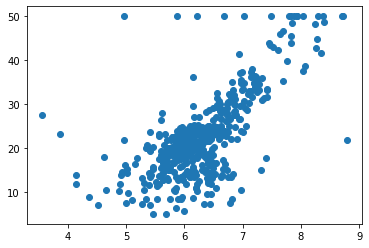

In [31]:
%matplotlib inline
plt.scatter(X.T[5], y)

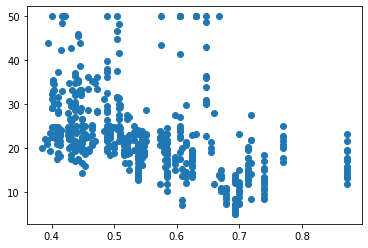

In [32]:
plt.scatter(X.T[4], y)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#train
model = l_reg.fit(X_train, y_train)

In [34]:
predictions = model.predict(X_test)

In [35]:
# Residual predictions, (y_pred - y_test)^2
print("R^2: ", l_reg.score(X, y))

R^2:  0.7386372828818748


In [36]:
# Scale factor of multiplication, slope basically
print("coeff: ", l_reg.coef_)

coeff:  [-8.80500128e-02  4.98556172e-02 -1.67436574e-02  2.89603249e+00
 -1.62308692e+01  3.78183028e+00  7.41240879e-03 -1.34312505e+00
  3.18682081e-01 -1.37384502e-02 -9.34502327e-01  7.64740505e-03
 -5.42100276e-01]


In [37]:
# y-intercept
print("intercept: ", l_reg.intercept_)

intercept:  35.9315181198417


### KNN

In [40]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import scale

In [41]:
df = load_breast_cancer()

In [50]:
X = scale(df.data)
print(X)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [52]:
y = df.target

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = KMeans(n_clusters=2, random_state=0)

model.fit(X_train)

KMeans(n_clusters=2, random_state=0)

In [54]:
predictions = model.predict(X_test)

In [56]:
labels = model.labels_

In [58]:
# print("labels: ", labels)
print("Predictions: ", predictions)
print("accuracy: ", accuracy_score(y_test, predictions))
print("Actual: ", y_test)

Predictions:  [1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0
 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0
 0 1 1]
accuracy:  0.05263157894736842
Actual:  [0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1
 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1
 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 0 1]


In [63]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn import svm

In [91]:
# Flatten images so that the classifier can be used on it
digits = datasets.load_digits()

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [93]:
digits.images.shape

(1797, 8, 8)

In [94]:
data.shape

(1797, 64)

In [97]:
digits.target  # The labels

array([0, 1, 2, ..., 8, 9, 8])

In [98]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

In [95]:
# Multi-layer Perceptron classifier. It uses stochastic gradient descent.
clf = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(64, 64))

In [99]:
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 64))

In [100]:
acc = clf.score(X_test, y_test)
print('accuracy: ', acc)

accuracy:  0.92880978865406


In [102]:
predicted = clf.predict(X_test)

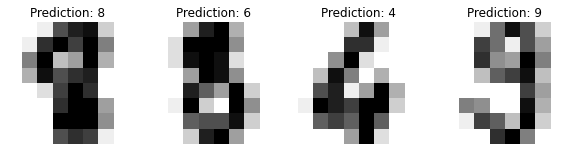

In [135]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [126]:
X_test[0.reshape((8,8))

array([[ 0.,  0.,  1., 11., 14., 15.,  3.,  0.],
       [ 0.,  1., 13., 16., 12., 16.,  8.,  0.],
       [ 0.,  8., 16.,  4.,  6., 16.,  5.,  0.],
       [ 0.,  5., 15., 11., 13., 14.,  0.,  0.],
       [ 0.,  0.,  2., 12., 16., 13.,  0.,  0.],
       [ 0.,  0.,  0., 13., 16., 16.,  6.,  0.],
       [ 0.,  0.,  0., 16., 16., 16.,  7.,  0.],
       [ 0.,  0.,  0., 11., 13., 12.,  1.,  0.]])

In [127]:
X_test[0]

array([ 0.,  0.,  1., 11., 14., 15.,  3.,  0.,  0.,  1., 13., 16., 12.,
       16.,  8.,  0.,  0.,  8., 16.,  4.,  6., 16.,  5.,  0.,  0.,  5.,
       15., 11., 13., 14.,  0.,  0.,  0.,  0.,  2., 12., 16., 13.,  0.,
        0.,  0.,  0.,  0., 13., 16., 16.,  6.,  0.,  0.,  0.,  0., 16.,
       16., 16.,  7.,  0.,  0.,  0.,  0., 11., 13., 12.,  1.,  0.])

In [114]:
axes

array([<AxesSubplot:title={'center':'Prediction: 8'}>,
       <AxesSubplot:title={'center':'Prediction: 6'}>,
       <AxesSubplot:title={'center':'Prediction: 4'}>,
       <AxesSubplot:title={'center':'Prediction: 9'}>], dtype=object)

In [113]:
list(zip(axes, X_test, predicted))

[(<AxesSubplot:title={'center':'Prediction: 8'}>,
  array([ 0.,  0.,  1., 11., 14., 15.,  3.,  0.,  0.,  1., 13., 16., 12.,
         16.,  8.,  0.,  0.,  8., 16.,  4.,  6., 16.,  5.,  0.,  0.,  5.,
         15., 11., 13., 14.,  0.,  0.,  0.,  0.,  2., 12., 16., 13.,  0.,
          0.,  0.,  0.,  0., 13., 16., 16.,  6.,  0.,  0.,  0.,  0., 16.,
         16., 16.,  7.,  0.,  0.,  0.,  0., 11., 13., 12.,  1.,  0.]),
  8),
 (<AxesSubplot:title={'center':'Prediction: 6'}>,
  array([ 0.,  0.,  6., 14., 16.,  5.,  0.,  0.,  0.,  2., 16., 16., 16.,
          7.,  0.,  0.,  0.,  2., 15., 16., 15.,  2.,  0.,  0.,  0.,  0.,
          6., 16., 15.,  7.,  0.,  0.,  0.,  0., 14., 10.,  6., 16.,  3.,
          0.,  0.,  1., 16.,  3.,  0., 16.,  7.,  0.,  0.,  0., 10., 11.,
         11., 15.,  3.,  0.,  0.,  0.,  3., 14., 16.,  6.,  0.,  0.]),
  6),
 (<AxesSubplot:title={'center':'Prediction: 4'}>,
  array([ 0.,  0.,  0.,  4., 15.,  6.,  0.,  0.,  0.,  0.,  0., 13., 13.,
          1.,  0.,  0.,  0.,  